# trim_floating_solid

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.filters.trim_floating_solid))

---
 ## Documentation for ``trim_floating_solid``
 ---
**<span style="color:purple">trim&#95;floating&#95;solid</span>_(im, conn=None)_**


Removes all solid that that is not attached to the edges of the image.


#### Parameters
* im : <b><i>ndarray</i></b>  The image of the porous material
* conn : <b><i>int</i></b>  For 2D the options are 4 and 8 for square and diagonal neighbors,
	while for the 3D the options are 6 and 26, similarily for square
	and diagonal neighbors. The default is the maximum option.

#### Returns
* image : <b><i>ndarray</i></b>  A version of ``im`` but with all the disconnected solid removed.

#### See Also
* find_disconnected_voxels
---

## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

In [3]:
im2d = np.zeros([300, 300])
im2d = ps.generators.RSA(im2d, radius=10, volume_fraction=0.7)
im2d = im2d < 0.5

In [4]:
dist = scipy.stats.norm(loc=20, scale=10)
im3d = ps.generators.polydisperse_spheres([300,300,300], 0.9, dist, 2, 10)
#im3d = im3d < 0.5

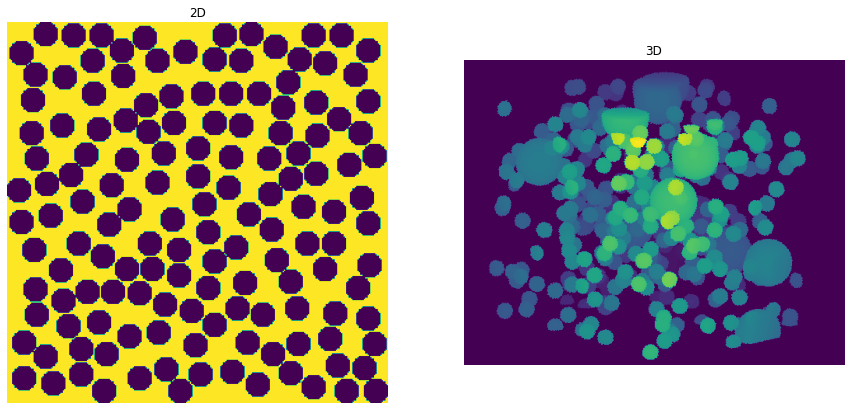

In [5]:
im3dvis = ps.visualization.show_3D(im3d)
fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(im2d);
ax[1].imshow(im3dvis);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('2D')
ax[1].set_title('3D')

#default values:
conn = None

## Apply filter function:
With different parameters

### 2D
Conn options are 4 or 8 for 2D images.

Text(0.5, 1.0, 'conn = 4')

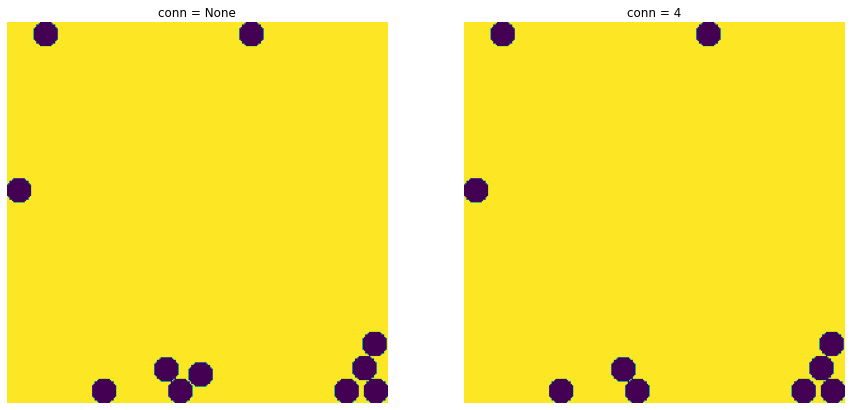

In [6]:
x = ps.filters.trim_floating_solid(im=im2d, conn=conn)
xx = ps.filters.trim_floating_solid(im=im2d, conn=4)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('conn = None')
ax[1].set_title('conn = 4')

### 3D
Conn options are 6 and 26 for 3D options.

Text(0.5, 1.0, 'conn = 6')

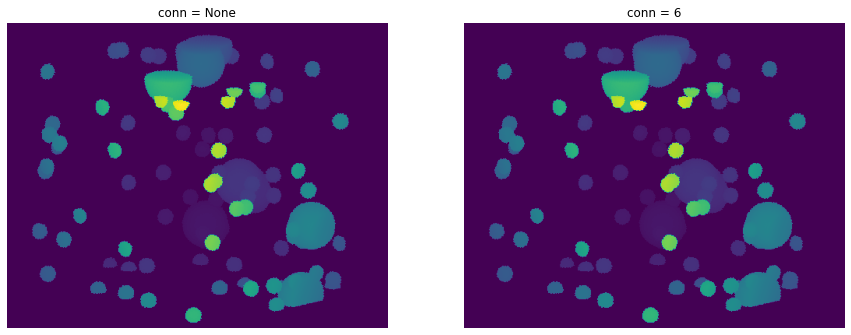

In [7]:
x = ps.filters.trim_floating_solid(im=im3d, conn=conn)
xx = ps.filters.trim_floating_solid(im=im3d, conn=6)

x3d = ps.visualization.show_3D(x)
xx3d = ps.visualization.show_3D(xx)
fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x3d);
ax[1].imshow(xx3d);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('conn = None')
ax[1].set_title('conn = 6')